## Transit Geometry

- Using long exposure times causes a deformation of the observed light curve.
- P can be determined accurately with three consecutive transits.
- Limb darkening effect: light curve shape is not a trapezoid! Depends on the properties of the stars and the wavelength of observations.

Computation of the light curve:

Given the complexity of measuring the transit parameters in presence of limb darkening, the forward modelling approach is preferred.

Necessary parameters:

- $P$: orbital period

- $T_c$: time of inferior conjunction

- $e$: orbital eccentricity

- $\omega$: argument of periastron

- $R_P/R_\star$: scaled planetary radius

- **EITHER** $a/R_\star$: scaled semi-major axis **or** $\rho_\star$: stellar density

- **EITHER** $b$: impact parameter, **or** $i$: orbital inclination.

Incomplete list of transit modelling softwares: **BATMAN**, **PyTransit**.

## Stellar density

The Kepler Third Law can be used to obtain the stellar density as a function of $a/R_\star$:

$$
\frac{a^3}{P^2} = \frac{G\left(M_{\star} + M_{p}\right)}{4\pi^{2}} \rightarrow \rho_\star + k^3 \rho_p = \frac{3\pi}{GP^2} \left(\frac{a}{R_\star}\right)^{3}
$$

**NEED TO ACKNOWLEDGE PAPERS USED WHEN WRITING REPORT!**

---

## Code

In [ ]:
## copy light curve that you obtained for tess and for taste into this Folder
## file containing the taste photometry, and one sector for tess after the filtering.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
%matplotlib widget

In [ ]:
##had to downgrade numpy for batman to work

In [2]:
import batman

In [3]:
params = batman.TransitParams()

In [4]:
params.t0 = 0.0
params.per = 1.0
params.rp = 0.1
params.a = 15.
params.inc = 87
params.ecc = 0.0
params.w = 90.
params.u = [0.1, 0.3]
params.limb_dark = 'quadratic'

In [5]:
t = np.linspace(-0.05,0.05,100)
m = batman.TransitModel(params, t)

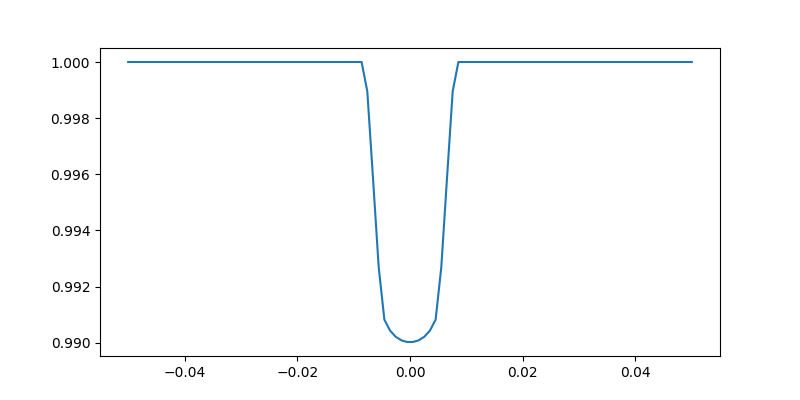

In [9]:
flux = m.light_curve(params)

##option to set exposure time but not gonna do that idk why


plt.figure(figsize=(8,4))
plt.plot(t,flux)
plt.show()

In [6]:
new_params = params
new_params.u = [0.0,0.0]
new_m = batman.TransitModel(params,t)
new_flux = m.light_curve(new_params)

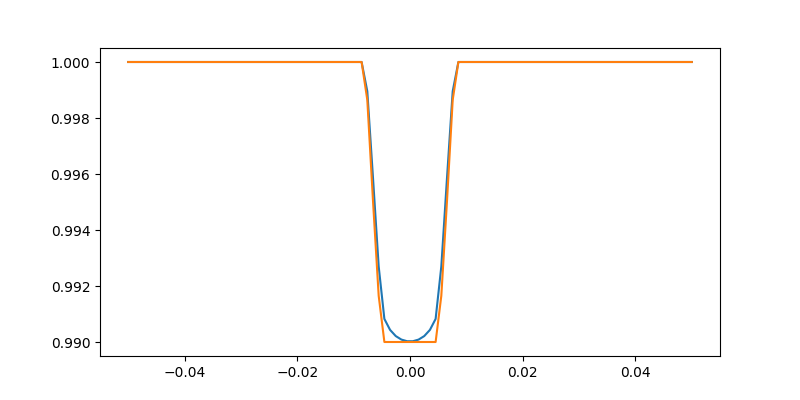

In [11]:
plt.figure(figsize=(8,4))
plt.plot(t,flux)
plt.plot(t,new_flux)
plt.show()

In [ ]:
#using parameters from Öztürk & Erdem 2019
##check the paper!!

##in addition, you will also need the stellar parameters. specifically, you need the 
##effective temp, the metallicity, and the gravity for the limb darkening.

##Explicitly avoid the tess input catalog and the gaia data release 2.

In [ ]:
Source	Öztürk & Erdem 2019
P (days)	1.0914199±0.0000002
a (au)	---
Rp (R⨁)	20.39±1.59
Rp (RJup)	1.819±0.142
Mp (M⨁)	448±32
Mp (MJup)	1.41±0.10
Mp sin i (M⨁)	---
Mp sin i (MJup)	---
ρ (g/cm3)	0.311±0.051
e	0
S (S⨁)	---
Teq (K)	2601±18
i (deg)	81.92±1.51
TC (days)	2454508.97824±0.00027 (BJD-TDB)
b	---
δ (%)	---
T14 (hours)	---
a/R✶	2.933 +0.163 -0.147
Rp/R✶	0.119±0.004
ω (deg)	---
K (m/s)	---
λ (deg)	---

In [7]:
P = 1.0914199
P_err = 0.0000002
Tc = 2454508.97824
Tc_err = 0.00027
a_scaled = 2.933
a_scaled_err = (.163,0.147)

In [8]:
##stellar parameters

Teff = 6300
Teff_err = (200,100)
metallicity = 0.30
metallicity_err = (.05, -.15)
log_g = 4.17
log_g_err = 0.03

## Deriving the limb darkening coefficient

Code by Hannu Parviainen

https://exoplanetarchive.ipac.caltech.edu/overview/Wasp-12

https://svo2.cab.inta-csic.es/theory/fps/index.php?mode=browse&gname=TESS&asttype=

In [9]:
from ldtk import SVOFilter, LDPSetCreator

In [11]:
##check your header and see what filter was used.

sloan_g = SVOFilter('SLOAN/SDSS.g')
sloan_r = SVOFilter('SLOAN/SDSS.r')
sloan_rprime = SVOFilter('SLOAN/SDSS.rprime_filter')
tess_fr = SVOFilter('TESS')

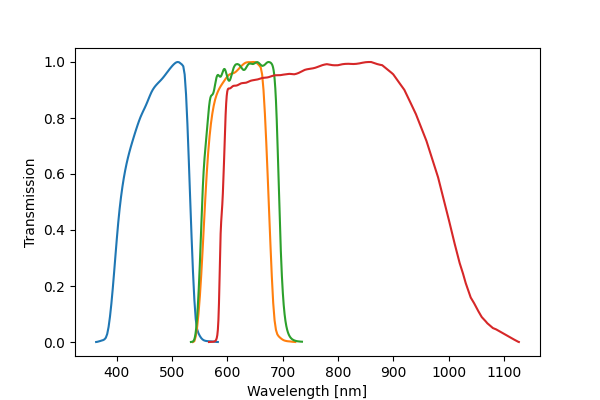

In [12]:
fig,ax = plt.subplots(figsize=(6,4))
sloan_g.plot(ax=ax)
sloan_r.plot(ax=ax)
sloan_rprime.plot(ax=ax)
tess_fr.plot(ax=ax)
plt.show()

In [ ]:
##NEED TO DO THIS PART ON THE LAB COMPUTERS!!

In [13]:
filters = [sloan_r, tess_fr]
sc = LDPSetCreator(teff=(Teff,150), logg=(log_g,log_g_err), z=(metallicity, 0.10), filters= filters)

ConnectionRefusedError: [Errno 61] Connection refused

In [ ]:
ps = sc.create_profiles(nsamples=2000)
ps.resample_linear_z(100)

In [ ]:
ps.set_uncertainty_multiplier(10)

In [ ]:
qm, qe = ps.coeffs_qd(do_mc=True, n_mc_samples = 10000)

In [ ]:
chains = np.array(ps._samples['qd'])

In [ ]:
np.shape(chains)

In [ ]:
u1_sloan_r_chains = chains[0,:,0]
u2_sloan_r_chains = chains[0,:,1]

In [ ]:
print(np.average(u1_sloan_r_chains), np.std(u1_sloan_r_chains))